#  Exploratory Data Analysis on Health Insurance Claims
## by (Chukwudi Onwuegbuchulam)

## Introduction
This dataset provides useful details about insurance claims, allowing us to examine demographic trends among claimants in greater detail. Age, sex, body mass index, blood pressure, diabetes status, children, smoking history, and location are all included in the dataset. We may learn more about who is likely to file an insurance claim by comparing these critical criteria across regions and demographic categories like age and gender. With this knowledge in hand, we can make educated decisions when we evaluate prospective clients for our services.



## Preliminary Wrangling

The first step is to import the necessary libraries and packages. In order to load our data and perform fast, vectorized operations on it, we will bring in the Numpy and Pandas libraries, and then the Matplotlib,plotly and Seaborn libraries, to enable us create informative visualisations:

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Loading the Dataset using Pandas
df=pd.read_csv('insurance_data.csv');
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Structure of dataset

In [3]:
df.shape

(1340, 11)

In [4]:
# Display quick summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


The dataframe has a total of 1,339 rows and 11 columns in its entirety (features).

In [5]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [6]:
#checking missing values
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

There are some missing  values in the table : age (5) and region (3)

In [7]:
#checking for unique values to know if we will drop some columns 
df.nunique()

index            1340
PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

The index column and the PatientID column both contain unique values in relation to the amount of data in the table.


In [8]:
#checking for duplicate
df.duplicated().sum()

0

There is no duplicate in the dataset.

## Data processing

In [9]:
# droping the index and PatientID
df.drop(columns=["index","PatientID"],
    inplace= True );
df.shape

(1340, 9)

working on the missing values for both age column and region column

In [10]:
#filling the age column with mean
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
#filling missing values in region column with the most amount of unique value in data
df['region'] = df['region'].fillna(df['region'].mode()[0])

# visualization

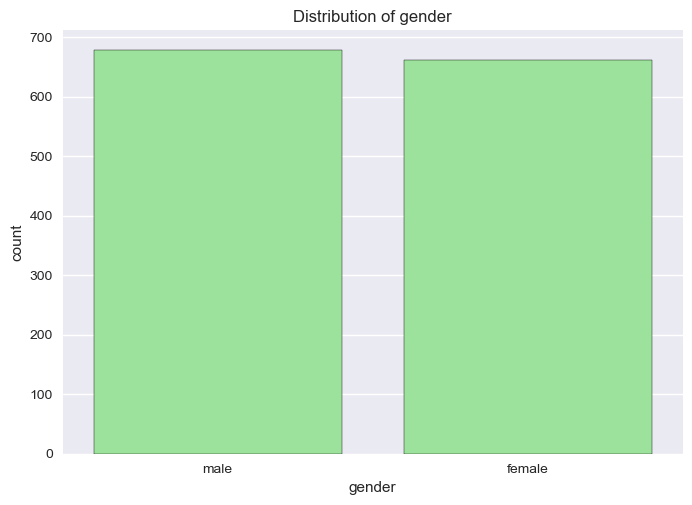

In [66]:
plt.style.use("seaborn")
sns.countplot(data=df,x='gender',color='lightgreen', edgecolor = 'black',)
plt.title("Distribution of gender");


This demonstrates that there were a somewhat greater number of males than females.



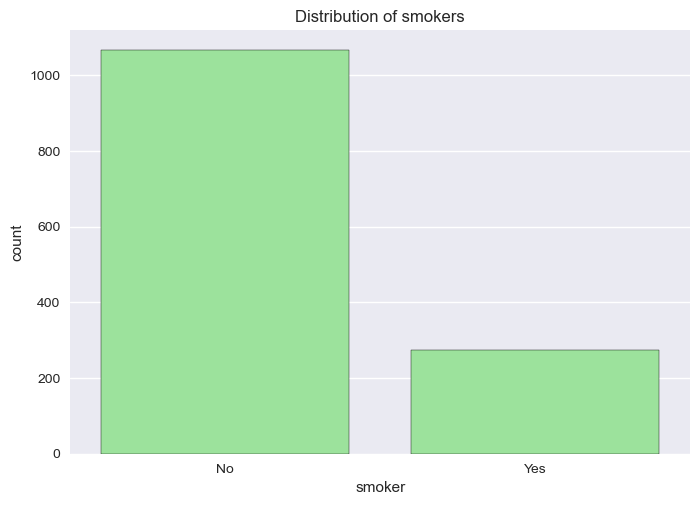

In [67]:
plt.style.use("seaborn")
sns.countplot(data=df,x='smoker',color='lightgreen', edgecolor = 'black',)
plt.title("Distribution of smokers");

According to the chart, there are more people who do not smoke than there are people who smoke.

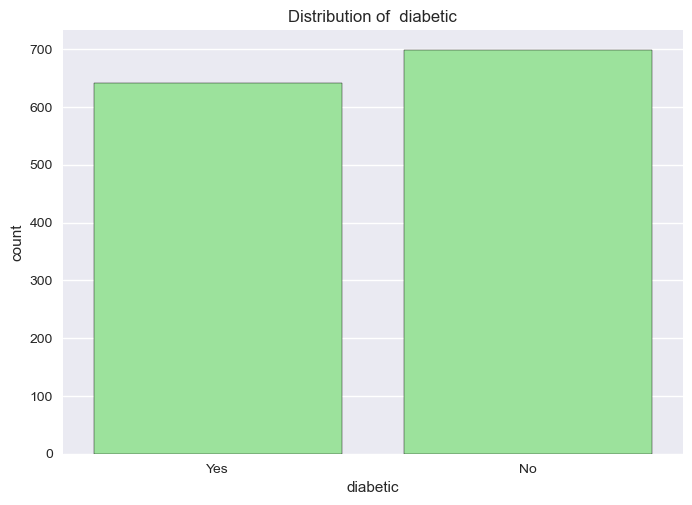

In [68]:
plt.style.use("seaborn")
sns.countplot(data=df,x='diabetic',color='lightgreen', edgecolor = 'black',)
plt.title("Distribution of  diabetic");

According to the chart, non-diabetics make up a greater percentage of the population than diabetics.

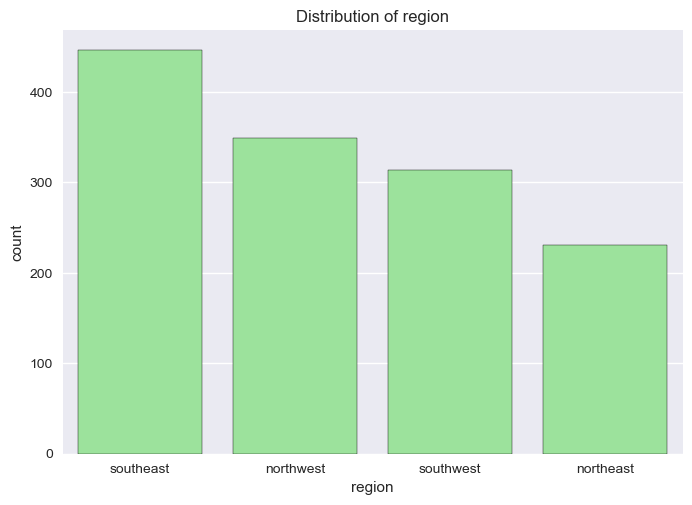

In [71]:
plt.style.use("seaborn")
sns.countplot(data=df,x='region',color='lightgreen', edgecolor = 'black')
plt.title("Distribution of region");

The data reveals that the Southeast had the highest number of respondents compared to the other regions, with the Northeast having the fewest.

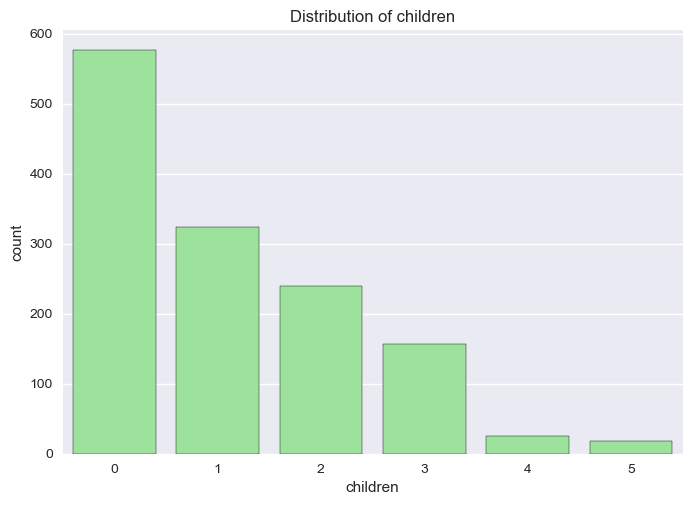

In [72]:
plt.style.use("seaborn")
sns.countplot(data=df,x='children',color='lightgreen', edgecolor = 'black')
plt.title("Distribution of children");

this chart reveals we have more count of children between 0 and 1 and less between 4 and 5.

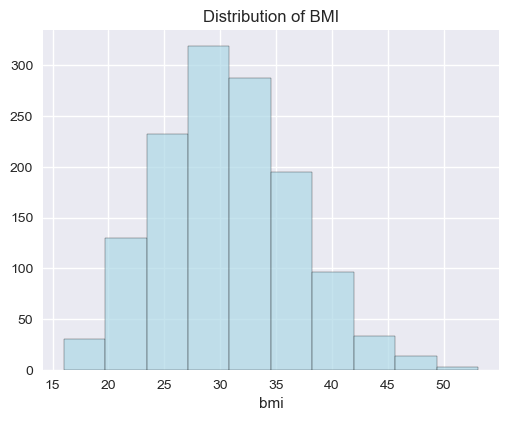

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi');
plt.title("Distribution of BMI");

The bmi seems to be very normally distributed.

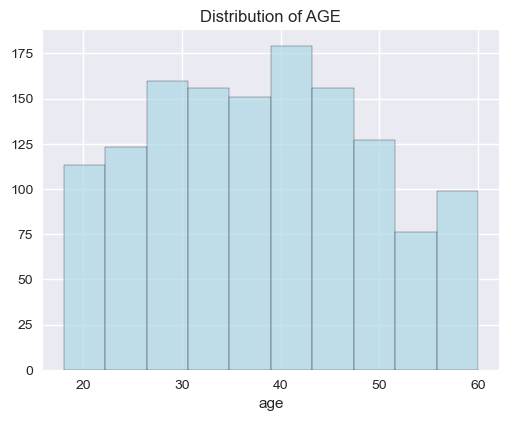

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age');
plt.title("Distribution of AGE");

It would appear that age is distributed quite evenly across the population.

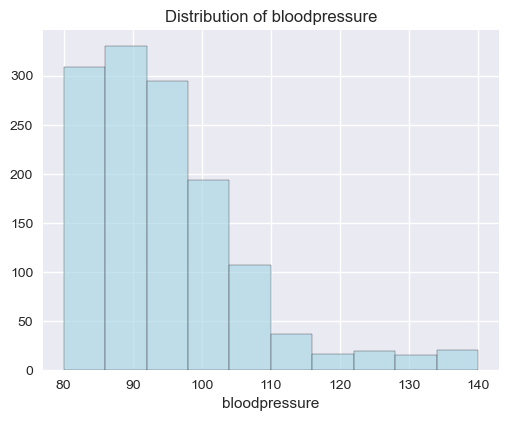

In [78]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bloodpressure, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bloodpressure');
plt.title("Distribution of bloodpressure");

There is a major imbalance in blood pressure.

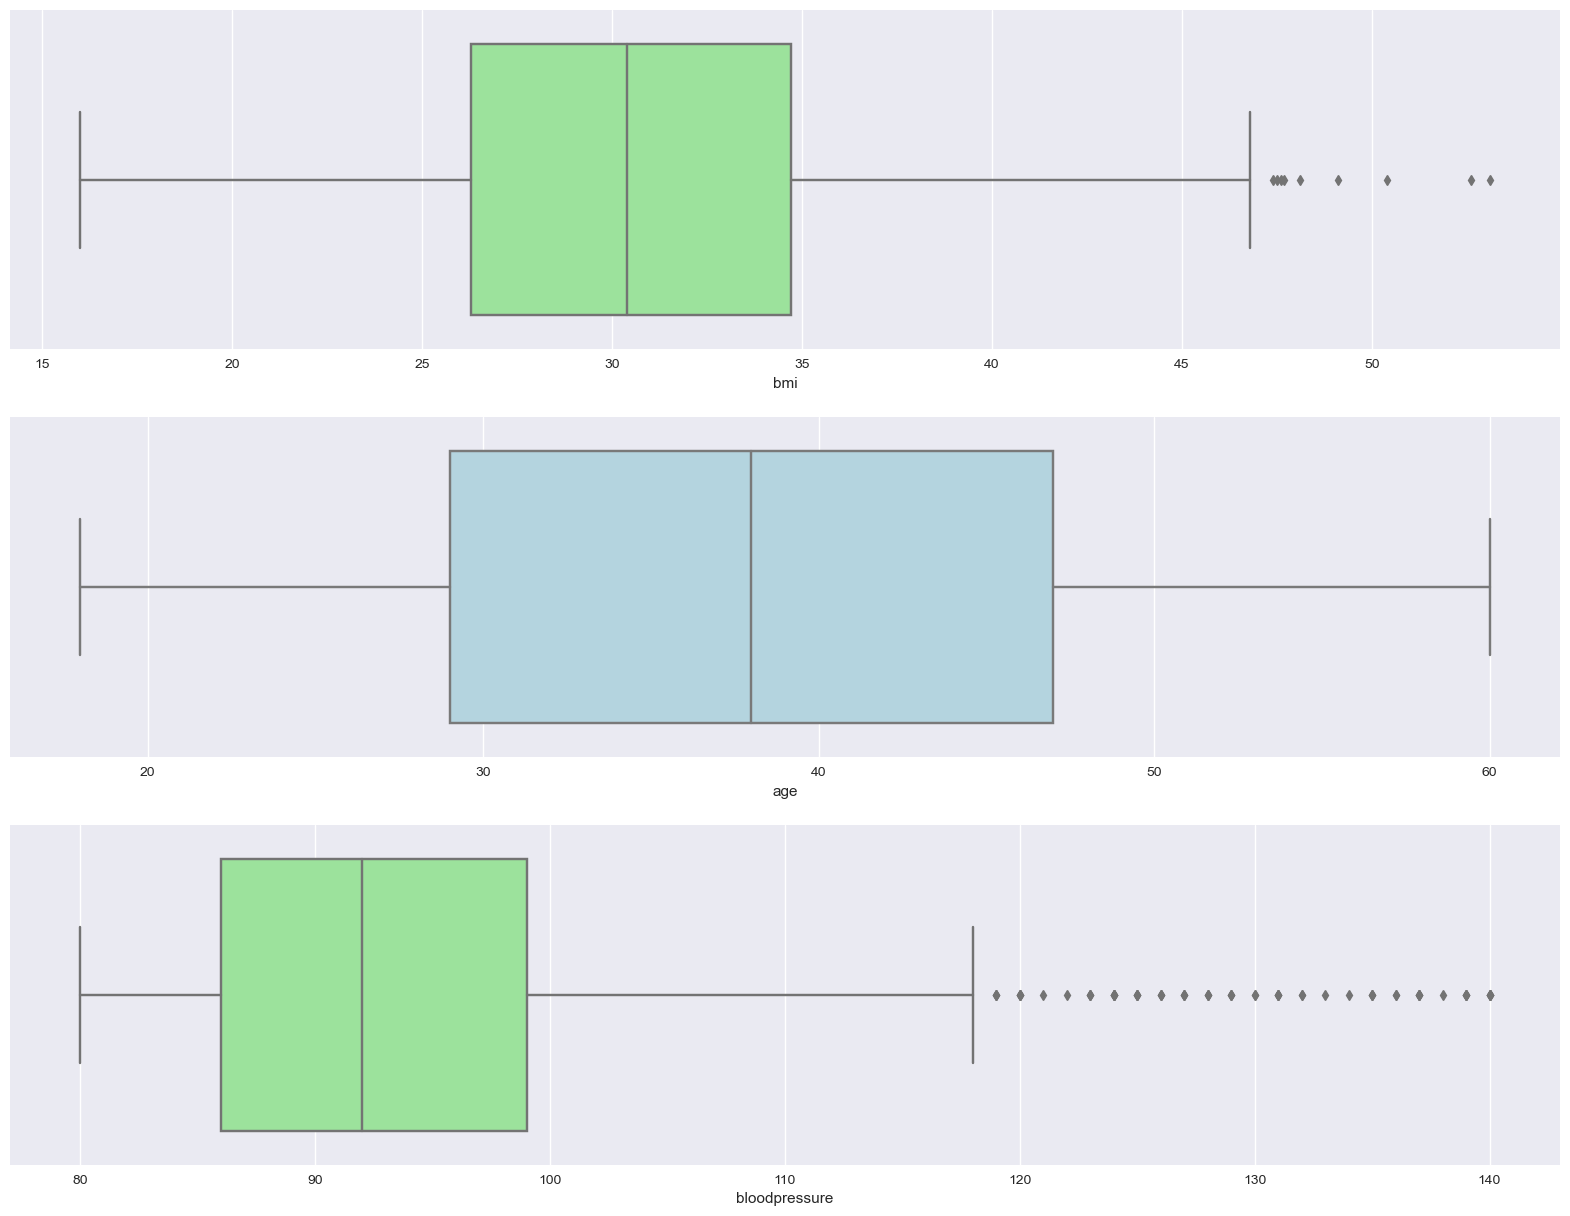

In [81]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.bloodpressure, color='lightgreen')

plt.show()

There are some outlandish bmi readings.
Bloodpressure because it is quite lopsided, and there are a great deal of values that are on the extreme end.

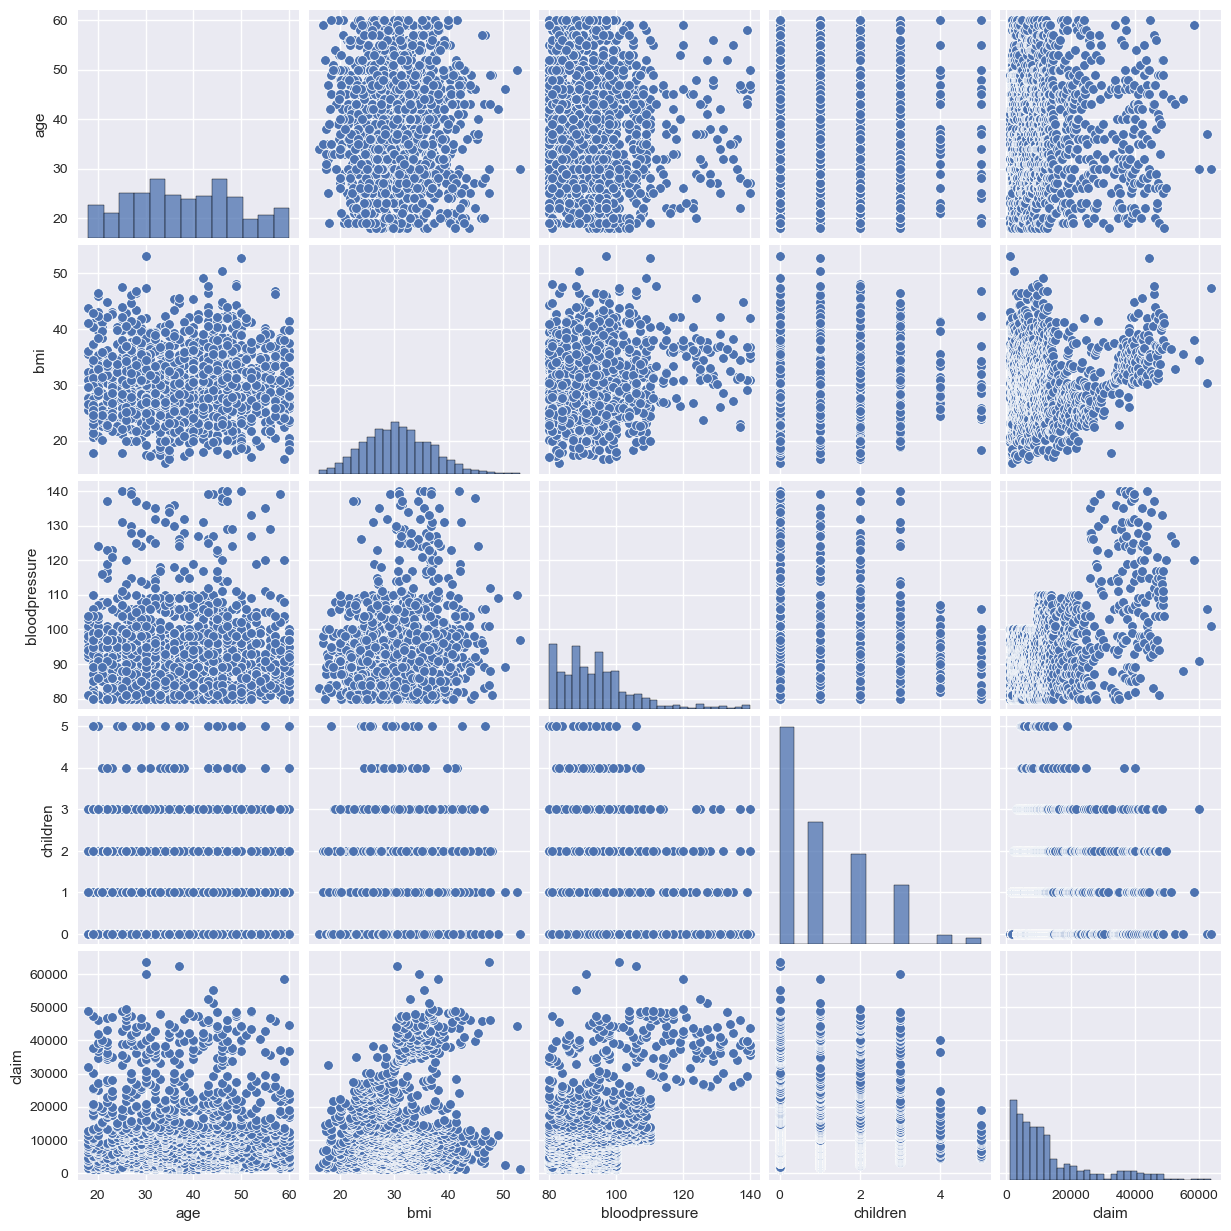

In [82]:
# Use the pairplot function to generate scatter plots for the variables
sns.pairplot(df)
plt.show()

The  obvious correlation of 'claim' is with BMI and Bloodpressure.

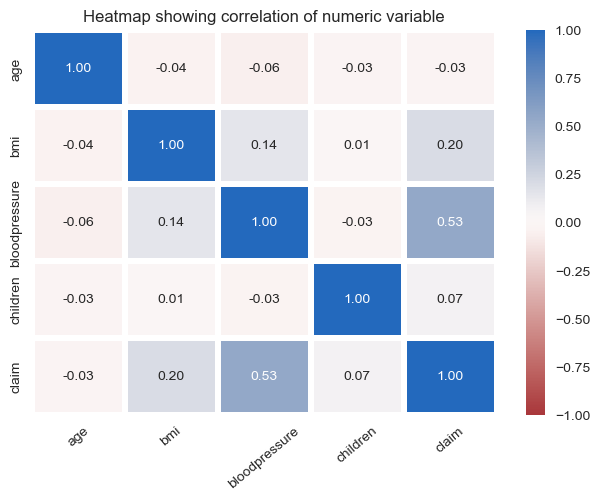

In [87]:
# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (7.5, 5))
sns.heatmap(data=df[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40)
plt.title('Heatmap showing correlation of numeric variable');

it seems there is a weak negative relationship (-0.03) between claim and and age. 
claim has a positive correlation of 0.20 and 0.53 for bmi and bloodpressure respectively.

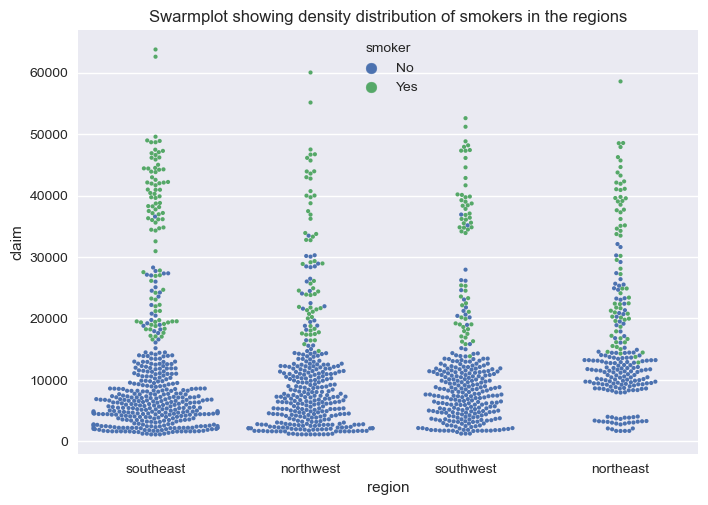

In [108]:
sns.swarmplot(data=df, x="region", y="claim",hue='smoker',size=3)
plt.title('Swarmplot showing density distribution of smokers in the regions');

More than 80% of nonsmokers file insurance claims for less than $15,000 while smokers file claims for more than $15,000.

# conclusion

This research utilised a dataset that contained 1340 observations and 11 different variables, all of which were taken from a health insurance claim.
The dataset was cleaned up, and some columns were taken out because they were not required for the study. The mean and mode were used to fill in the blanks in the age and regions.
We were able to gain a number of insights through the use of visualisations, such as the count of various variables, the relationships between variables, the correlation between numerical variables, and also the utilisation of the swarmplot in order to check the density of claims in terms of regions and smokers.